In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting
import seaborn as sns                  # advanced plotting
import geopandas
from matplotlib.legend_handler import HandlerLine2D
import patsy                           # provides a syntax for specifying models  
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

In [2]:
# load in data

df = pd.read_csv('MERGED2016_17_PP.csv')
print(df.info())       #check the basic information of the dataframe that I just loaded in. 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1431,1432,1503,1504,1517,1518,1519,1529,1530,1531,1532,1534,1535,1537,1538,1539,1540,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1606,1610,1611,1614,1615,1616,1708,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Columns: 1899 entries, UNITID to OMENRUP8_PTNFT_POOLED_SUPP
dtypes: float64(1662), int64(17), object(220)
memory usage: 104.0+ MB
None


In [3]:
#examine and clean up 

df.head(2)
cols_to_get = ['INSTNM', 'STABBR', 'NUMBRANCH','PREDDEG','HIGHDEG','MENONLY','WOMENONLY','SAT_AVG','ACTCMMID','UGDS','UGDS_WHITE',
 'UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_NRA','UGDS_UNKN','NPT4_PUB','NPT4_PRIV','C150_4',
              'C150_L4','C150_4_NRA','C150_4_UNKN','C150_4_WHITENH','C150_4_BLACKNH','C150_4_API','C150_4_AIANOLD','C150_4_HISPOLD','C150_4_WHITE','C150_4_BLACK',
              'LO_INC_WDRAW_ORIG_YR4_RT','MD_INC_WDRAW_ORIG_YR4_RT','HI_INC_WDRAW_ORIG_YR4_RT','NUM41_PUB','NUM42_PUB','NUM43_PUB','NUM44_PUB'
              ,'NUM45_PUB','NUM41_PRIV','NUM42_PRIV','NUM43_PRIV','NUM44_PRIV','NUM45_PRIV','LO_INC_COMP_ORIG_YR4_RT','MD_INC_COMP_ORIG_YR4_RT','HI_INC_COMP_ORIG_YR4_RT','FEMALE_COMP_ORIG_YR8_RT','MALE_COMP_ORIG_YR8_RT','COSTT4_A'
              ,'FEMALE']
df_og = df[cols_to_get]            # get all the columns that I potentially need in the following anaylysis  
df_og.head(10)                     # check if all the columns that I might need is loaded in correctly and also check if there are any missing values.

,INSTNM,STABBR,NUMBRANCH,PREDDEG,HIGHDEG,MENONLY,WOMENONLY,SAT_AVG,ACTCMMID,UGDS,...,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,LO_INC_COMP_ORIG_YR4_RT,MD_INC_COMP_ORIG_YR4_RT,HI_INC_COMP_ORIG_YR4_RT,FEMALE_COMP_ORIG_YR8_RT,MALE_COMP_ORIG_YR8_RT,COSTT4_A,FEMALE
0,Alabama A & M University,AL,1,3,4,0.0,0.0,849.0,18.0,4616.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22667.0,0.5640301318
1,University of Alabama at Birmingham,AL,1,3,4,0.0,0.0,1125.0,25.0,12047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22684.0,0.6390907397
2,Amridge University,AL,1,3,4,0.0,0.0,NaN,NaN,293.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,13380.0,0.6486486486
3,University of Alabama in Huntsville,AL,1,3,4,0.0,0.0,1257.0,28.0,6346.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22059.0,0.4763499372
4,Alabama State University,AL,1,3,4,0.0,0.0,825.0,17.0,4704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19242.0,0.6134185304
5,The University of Alabama,AL,1,3,4,0.0,0.0,1202.0,27.0,31663.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28422.0,0.6152524168
6,Central Alabama Community College,AL,1,2,2,0.0,0.0,NaN,NaN,1492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13868.0,0.6037383178
7,Athens State University,AL,1,3,3,0.0,0.0,NaN,NaN,2888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705078125
8,Auburn University at Montgomery,AL,1,3,4,0.0,0.0,1009.0,22.0,4171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19255.0,0.6929480901
9,Auburn University,AL,1,3,4,0.0,0.0,1217.0,27.0,22095.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29794.0,0.531504671


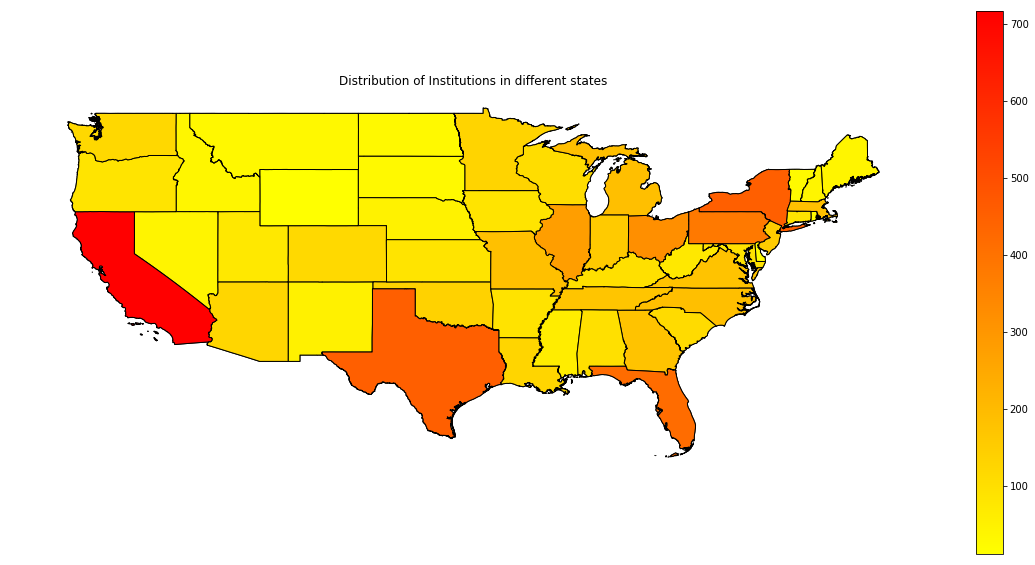

In [4]:
# map for number of institutions in different states 
states = geopandas.read_file('cb_2017_us_state_500k/cb_2017_us_state_500k.shp')        #load and graph the map of the u.s.
states.columns = [col_name.lower() for col_name in states.columns]                  
stusps = [ 'GU', 'MP', 'AS', 'PR', 'VI', 'AK', 'HI','FM', 'MH','PW']                   # in the dataset, there are some states that are missing all the necessary values
states = states[ ~states['stusps'].isin(stusps) ]                                      # exclude all the states that does not have valid value
states = states.rename(columns={'stusps':'state'})

map_st = df[['INSTNM', 'STABBR']]                                                      #make the dataframe that contains only number of states and name of states
map_st = map_st.rename(columns={'STABBR':'state','INSTNM':'num'})
map_st = map_st.groupby('state').count()
map_st = map_st[ ~map_st.index.isin(stusps) ]
map_st = map_st.reset_index()
map_st = map_st.sort_values('num',ascending = False)


mp = pd.merge(left=states, right=map_st, on=['state'], how='outer')


fig, gax = plt.subplots(figsize=(20,10))                                              # plot the map based on the table 
states.plot(ax = gax,edgecolor='black', color = 'white')
mp.plot(ax = gax, edgecolor='black', column='num',  legend = True, cmap='autumn_r')      
plt.axis('off')
gax.set_title('Distribution of Institutions in different states')
plt.savefig('map.pdf')

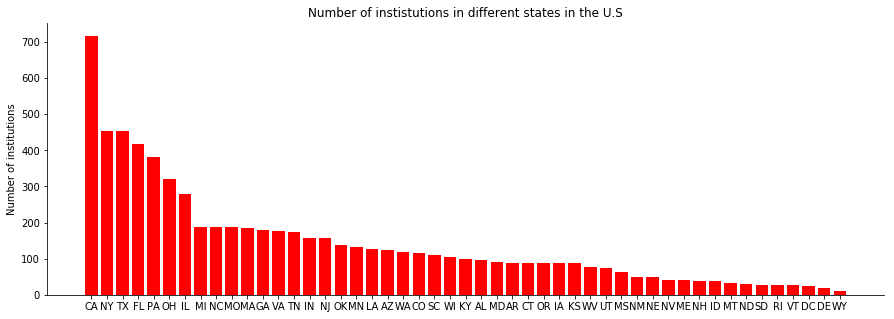

In [5]:
#bar chart for better illustration of number of institutions in different states

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(map_st.state, map_st['num'], color='red', alpha=1)  

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of institutions')
ax.set_title('Number of instistutions in different states in the U.S')
plt.savefig('bar_1.pdf')
plt.show()

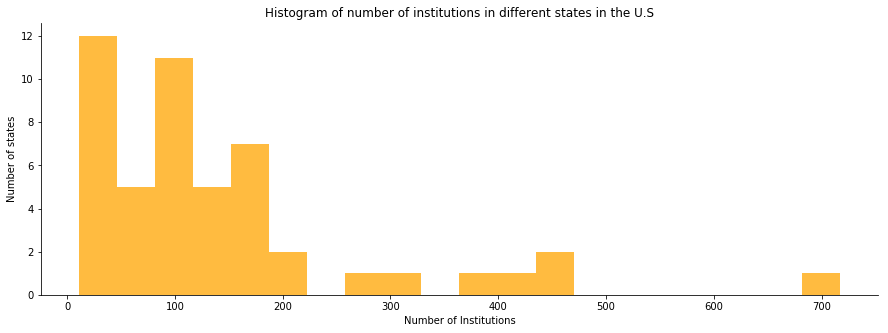

In [6]:
#histogram to see the distribution of number of institutions in different states in the U.S
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(map_st['num'], bins=20, color='orange', alpha=0.75) 
ax.set_xlabel('Number of Institutions')
ax.set_ylabel('Number of states')
ax.set_title('Histogram of number of institutions in different states in the U.S')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)   
plt.savefig('his_1.pdf')

In [7]:
#SAT _ avg, act_median vs state
score = df[['INSTNM', 'STABBR','SAT_AVG','ACTCMMID','C150_4']]                  # create a tabe that only contains average SAT score, 
score = score.rename(columns={'STABBR':'state','SAT_AVG':'sat', 'ACTCMMID':'act', 'C150_4':'complete_r'})     #median act score and average completion rate 
score = score.groupby('state').mean()
score = score.dropna()
score = score.sort_values('sat',ascending = False)
score.to_excel('score.xlsx')
score.head(10)

,sat,act,complete_r
state,,,
DC,1190.800000,26.600000,0.464325
RI,1160.400000,25.800000,0.703270
MA,1142.800000,25.800000,0.623126
UT,1136.000000,25.000000,0.418642
NH,1119.833333,24.500000,0.580727
WA,1113.888889,24.722222,0.464052
CA,1113.859155,24.859155,0.555366
NY,1110.494505,25.012195,0.528128
MN,1102.066667,24.133333,0.512270


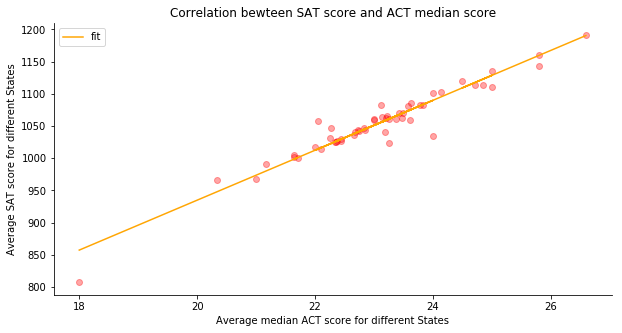

In [8]:
# graph the correlation bewteen average SAT score and average ACT median  in different states
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(score["act"], score["sat"], color = 'red' , alpha = 0.35)

score['1'] = 1                                                            # creates a fitted line function that takes x as ACT median 
res = np.linalg.lstsq(score[['act','1']] , score['sat'], rcond=None)      # y as fitted value


coefficients = res[0] 
m = coefficients[0] 
n = coefficients[1] 
score["fit"] = score["act"] * m + n
score.plot.line(x='act', y='fit', c='orange', ax=ax,alpha = 5) 


ax.set_ylabel('Average SAT score for different States')
ax.set_xlabel('Average median ACT score for different States')                
ax.set_title('Correlation bewteen SAT score and ACT median score')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
plt.savefig('line_1.pdf')

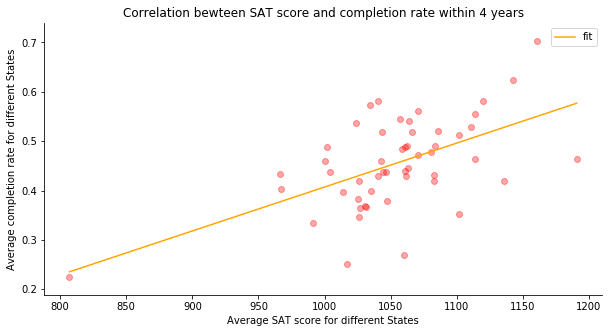

In [9]:
# graph the correlation bewteen average SAT score and completion rate in different state
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(score["sat"], score["complete_r"], color = 'red' , alpha = 0.35)

score['1'] = 1
res = np.linalg.lstsq(score[['sat','1']] , score['complete_r'], rcond=None)          # create a fitted line function that takes x as 
                                                                                     # fitted value as y 
               
coefficients = res[0] 
m = coefficients[0] 
n = coefficients[1] 
score["fit"] = score["sat"] * m + n
score.plot.line(x='sat', y='fit', c='orange', ax=ax,alpha = 5) 


ax.set_ylabel('Average completion rate for different States')
ax.set_xlabel('Average SAT score for different States')                
ax.set_title('Correlation bewteen SAT score and completion rate within 4 years')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
plt.savefig('line_2.pdf')

In [10]:
# table between different race and completion rate

race = df[['STABBR','C150_4_WHITE','C150_4_BLACK','C150_4','C150_4_NRA','C150_4_UNKN','C150_4_WHITENH','C150_4_BLACKNH','C150_4_API','C150_4_AIANOLD',
    'C150_4_HISPOLD']]
race =  df[['STABBR','C150_4_WHITE','C150_4_BLACK','C150_4_NRA','C150_4_UNKN']]                                                                             # load in value that contains different race cohort
race = race.groupby('STABBR').mean()
race = race.rename(columns={'STABBR':'state','SAT_AVG':'sat', 'ACTCMMID':'act', 'C150_4_WHITE':'white','C150_4_BLACK':'black','C150_4_NRA':'alien',         # label them  white race cohort as white, black race cohort
                          'C150_4_UNKN':'unknow' })                                                                                                         # non resident of alien as alien, unknow as unknow
race = race.dropna()                      

race_sample1 = race.loc[['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','GU','HI','IA','ID','IL','IN',                                               # seperate them into two groups since one graph will not fit all
'KS','KY','LA','MA','MD','ME','MI','MN','MO']]

race_sample2 = race.loc[['MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OH','OK','OR','PA','PR','RI',
'SC','SD','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY']]


race = race.reset_index()
race_sample1 =  race_sample1.reset_index()
race_sample2 = race_sample2.reset_index()
race = race.melt(id_vars=['STABBR'])
race_sample1 = race_sample1.melt(id_vars=['STABBR'])    
race_sample2 = race_sample2.melt(id_vars=['STABBR'])
race = race.rename(columns={'STABBR':'state','variable':'race','value':'completion_r'})
race_sample1 = race_sample1.rename(columns={'STABBR':'state','variable':'race','value':'completion_r'})
race_sample2 = race_sample2.rename(columns={'STABBR':'state','variable':'race','value':'completion_r'})
race.to_excel('race.xlsx')
race.head()
# setup the table so that 'race' is the new column name and different cohorts can be turned into dummy varaibles 
# it will be easier for the linear regression 


,state,race,completion_r
0,AK,white,0.293780
1,AL,white,0.438915
2,AR,white,0.442991
3,AZ,white,0.458039
4,CA,white,0.574838


In [11]:
# turn four cohorts into four dummy variables. For instance white cohort will have white:1 black:0 alien: 0 unknow :0
race.loc[race['race']=='white', 'white'] = 1
race.loc[race['race']=='black', 'black'] = 1
race.loc[race['race']=='alien', 'alien'] = 1
race.loc[race['race']=='unknow', 'unknow'] = 1
race['white'] = race['white'].fillna(0)
race['black'] = race['black'].fillna(0)
race['alien'] = race['alien'].fillna(0)
race['unknow'] = race['unknow'].fillna(0)
race.head(10)

,state,race,completion_r,white,black,alien,unknow
0,AK,white,0.293780,1.0,0.0,0.0,0.0
1,AL,white,0.438915,1.0,0.0,0.0,0.0
2,AR,white,0.442991,1.0,0.0,0.0,0.0
3,AZ,white,0.458039,1.0,0.0,0.0,0.0
4,CA,white,0.574838,1.0,0.0,0.0,0.0
5,CO,white,0.504049,1.0,0.0,0.0,0.0
6,CT,white,0.651404,1.0,0.0,0.0,0.0
7,DC,white,0.525022,1.0,0.0,0.0,0.0
8,DE,white,0.477750,1.0,0.0,0.0,0.0
9,FL,white,0.482558,1.0,0.0,0.0,0.0


In [12]:
# make the table for a individaul state plot so that the comparison between different cohorts is more clear
race_plot_1 = race.set_index('state')
race_plot_1 = race_plot_1.loc[['MA' ]]                 # MA and RI are picked because they are realtively the highest for all four cohorts
race_plot_2 = race.set_index('state')
race_plot_2 = race_plot_2.loc[['RI']]
race_plot_1 = race_plot_1.reset_index()

race_plot_2 = race_plot_2.reset_index()

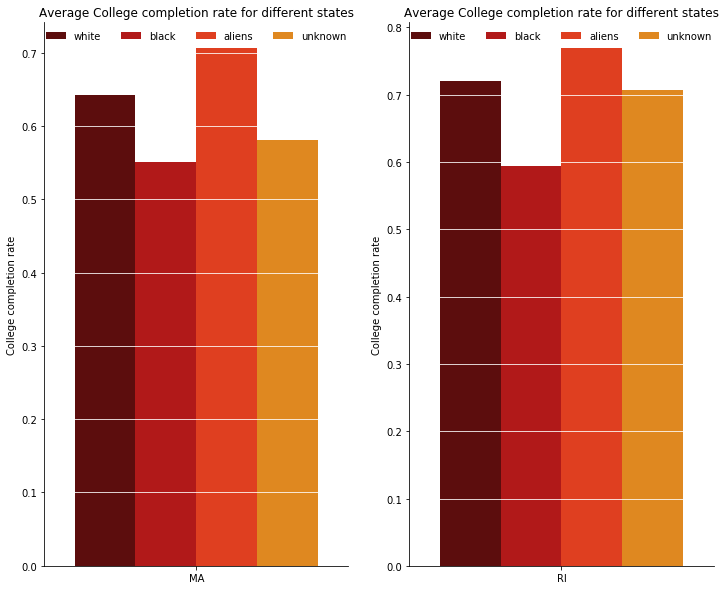

In [13]:
#plot the graph for two individaul states so that the comparison between different cohorts is more clear
fig, ax = plt.subplots(1,2 ,figsize=(12,10))


sns.barplot(x='state', y = 'completion_r', hue='race', data=race_plot_1,
           ax = ax[0], palette = sns.color_palette('hot'), 
           )                                                                  
                                                                                
sns.despine() 
# first graph on the left
ax[0].set_xlabel('')                       
ax[0].set_ylabel('College completion rate')
ax[0].set_title('Average College completion rate for different states')

# Clean up the legend. 
ax[0].legend().set_title('')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['white', 'black', 'aliens', 'unknown'], frameon=False, ncol=10, loc='upper center')

ax[0].grid(axis='y', color='white')

sns.barplot(x='state', y = 'completion_r', hue='race', data=race_plot_2,
           ax = ax[1], palette = sns.color_palette('hot'), 
           )                                                                  
                                                                                
sns.despine() 
# second graph on the right
ax[1].set_xlabel('')                       
ax[1].set_ylabel('College completion rate')
ax[1].set_title('Average College completion rate for different states')

# Clean up the legend. 
ax[1].legend().set_title('')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, ['white', 'black', 'aliens', 'unknown'], frameon=False, ncol=10, loc='upper center')

ax[1].grid(axis='y', color='white')
plt.savefig('his2.pdf')
plt.show()

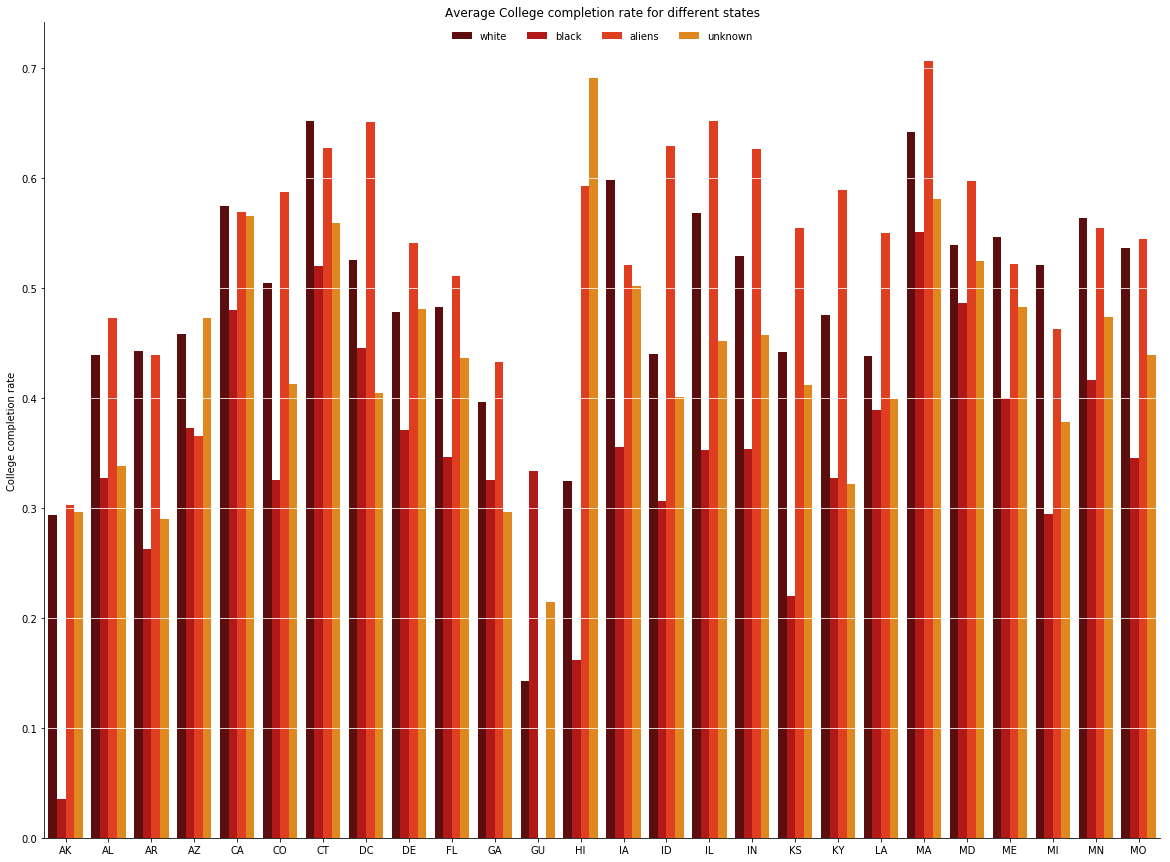

In [14]:
#graph different cohorts' completion rate.
fig, ax = plt.subplots(figsize=(20,15))


sns.barplot(x='state', y = 'completion_r', hue='race', data=race_sample1,
           ax = ax, palette = sns.color_palette('hot'), 
           )                                                                  
                                                                                
sns.despine() 

ax.set_xlabel('')                       
ax.set_ylabel('College completion rate')
ax.set_title('Average College completion rate for different states')

# Clean up the legend. 
ax.legend().set_title('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['white', 'black', 'aliens', 'unknown'], frameon=False, ncol=10, loc='upper center')

ax.grid(axis='y', color='white')
plt.savefig('his3.pdf')
plt.show()


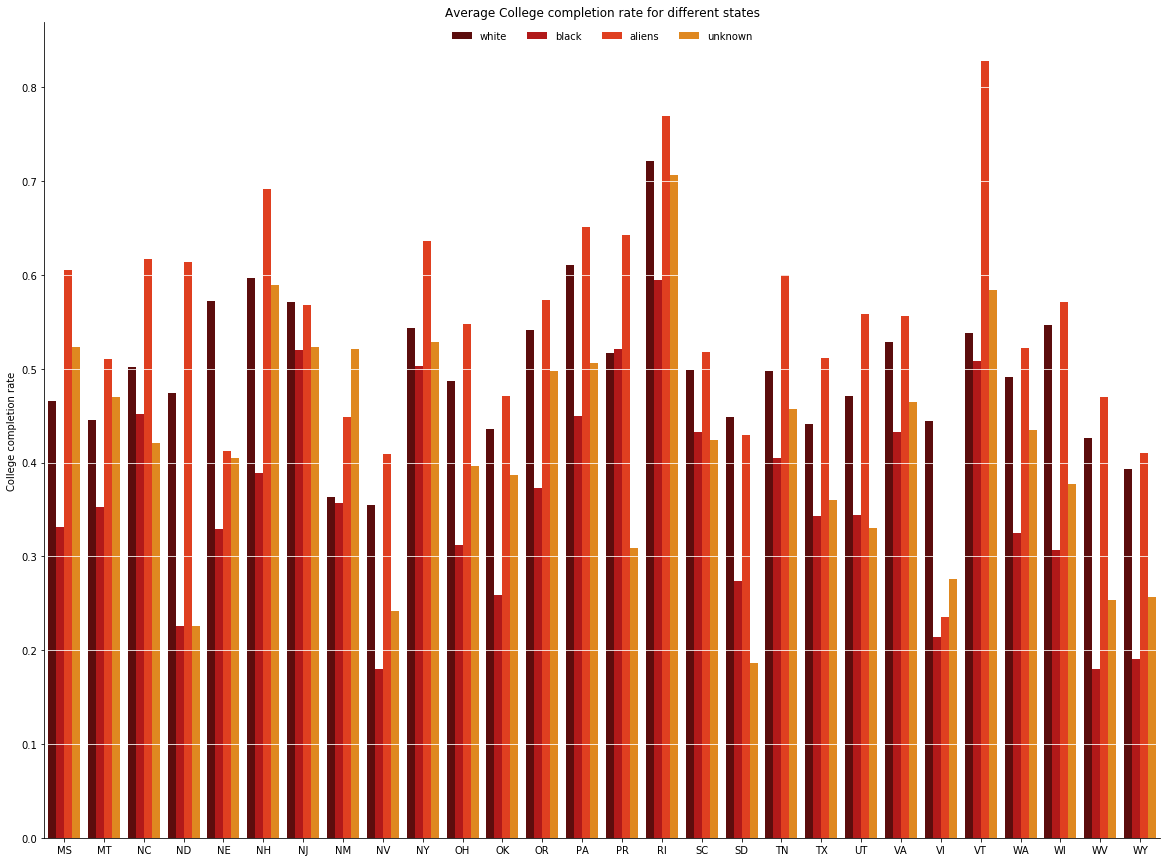

In [15]:
#GRAPH the rest of states for different cohorts' completion rate
fig, ax = plt.subplots(figsize=(20,15))


sns.barplot(x='state', y = 'completion_r', hue='race', data=race_sample2,
           ax = ax, palette = sns.color_palette('hot'), 
           )                                                                  
                                                                                
sns.despine() 

ax.set_xlabel('')                       
ax.set_ylabel('College completion rate')
ax.set_title('Average College completion rate for different states')

# Clean up the legend. 
ax.legend().set_title('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['white', 'black', 'aliens', 'unknown'], frameon=False, ncol=10, loc='upper center')

ax.grid(axis='y', color='white')
plt.savefig('his4.pdf')

plt.show()


In [16]:
#table of net price for different income gorup for public school
# income gorup are seperated in $0-$30,000, $30,001-$48,000, $48,001-$75,000, $75,001-$110,000 and $110,000 over
# they will be labeled from low to high in 0 -4

income_pub = df[['STABBR','NUM41_PUB','NUM42_PUB','NUM43_PUB','NUM44_PUB'
              ,'NUM45_PUB']]
income_pub = income_pub.dropna()
income_pub = income_pub.rename(columns={'STABBR':'state','NUM41_PUB':'0', 'NUM42_PUB':'1', 'NUM43_PUB':'2','NUM44_PUB':'3','NUM45_PUB':'4'})
income_pub = income_pub.groupby('state').mean()
income_pub = income_pub.reset_index()
income_pub.to_excel('income_1.xlsx')
income_pub.head(10)



,state,0,1,2,3,4
0,AK,69.000000,28.200000,34.400000,23.200000,21.400000
1,AL,297.842105,76.421053,55.894737,44.078947,43.921053
2,AR,179.000000,70.764706,57.117647,32.823529,28.588235
3,AS,199.000000,27.000000,15.000000,1.000000,0.000000
4,AZ,228.300000,105.933333,81.066667,52.800000,51.633333
5,CA,372.531646,143.265823,103.303797,44.000000,48.645570
6,CO,131.100000,75.566667,78.400000,78.300000,79.566667
7,CT,153.869565,52.304348,52.565217,43.565217,71.217391
8,DC,76.000000,29.000000,13.000000,4.000000,2.000000
9,DE,257.666667,137.333333,143.333333,97.000000,123.333333


In [17]:
#table of net price for different income gorup for private school
# income gorup are seperated in $0-$30,000, $30,001-$48,000, $48,001-$75,000, $75,001-$110,000 and $110,000 over
# they will be labeled from low to high in 0 -4
income_pri = df[['STABBR','NUM41_PRIV','NUM42_PRIV','NUM43_PRIV','NUM44_PRIV','NUM45_PRIV']]
income_pri = income_pri.dropna()
income_pri = income_pri.rename(columns={'STABBR':'state','NUM41_PRIV':'0', 'NUM42_PRIV':'1', 'NUM43_PRIV':'2','NUM44_PRIV':'3','NUM45_PRIV':'4'})
income_pri = income_pri.groupby('state').mean()
income_pri = income_pri.reset_index()
income_pri.to_excel('income_2.xlsx')
income_pri.head(10)


,state,0,1,2,3,4
0,AK,34.500000,8.500000,2.000000,1.500000,1.750000
1,AL,59.714286,16.119048,16.214286,10.333333,10.666667
2,AR,45.071429,10.404762,11.833333,10.190476,13.380952
3,AZ,134.576923,25.679487,14.282051,9.961538,10.692308
4,CA,52.384615,13.781638,10.846154,8.414392,13.560794
5,CO,45.809524,11.460317,9.253968,8.269841,13.380952
6,CT,68.346154,25.596154,23.788462,25.596154,59.019231
7,DC,121.357143,49.714286,50.000000,55.000000,133.357143
8,DE,64.750000,17.583333,12.583333,8.666667,7.666667
9,FL,104.820833,19.475000,13.716667,10.262500,14.704167


In [18]:
# the table for average tuition fee with average college completion rate
# tuition fee will be labeled as cost
cost= df[['STABBR','COSTT4_A','C150_4']]
cost = cost.dropna()
cost = cost.rename(columns={'STABBR':'state','COSTT4_A':'fee',  'C150_4':'complete_r'})
cost = cost.groupby('state').mean()
cost.to_excel('cost.xlsx')
cost.head(10)


,fee,complete_r
state,,
AK,19881.200000,0.270360
AL,25449.257143,0.396829
AR,25688.318182,0.391655
AS,6940.000000,0.346000
AZ,27848.038462,0.414596
CA,36171.382166,0.551950
CO,29364.931034,0.421907
CT,38527.814815,0.594556
DC,42153.090909,0.504009


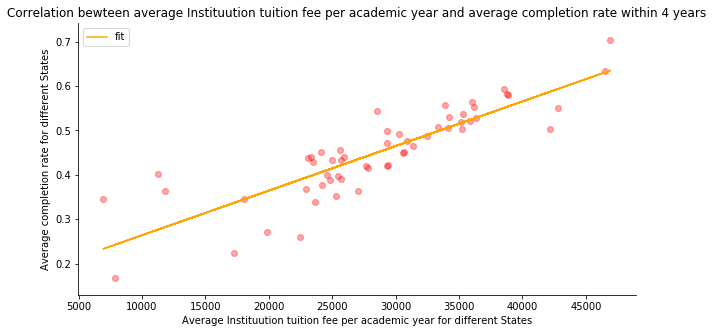

In [19]:
# the graph for average tuition fee with average college completion rate
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(cost["fee"], cost["complete_r"], color = 'red' , alpha = 0.35)

cost['1'] = 1
res = np.linalg.lstsq(cost[['fee','1']] , cost['complete_r'], rcond=None)                  # fitted line function for the scatter plot
                                                                                           # x value will be tuition fee: cost
                                                                                           # y value will be the fitted value
coefficients = res[0] 
m = coefficients[0] 
n = coefficients[1] 
cost["fit"] = cost["fee"] * m + n
cost.plot.line(x='fee', y='fit', c='orange', ax=ax,alpha = 5) 


ax.set_ylabel('Average completion rate for different States')
ax.set_xlabel('Average Instituution tuition fee per academic year for different States')                
ax.set_title('Correlation bewteen average Instituution tuition fee per academic year and average completion rate within 4 years')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
plt.savefig('hist5.pdf')

In [20]:
#linear regression table setup 
score = score.reset_index()

cost = cost.reset_index()

tem = pd.merge(left=score, right=race, on=['state'], how='inner')

ols = pd.merge(left=tem, right=cost, on=['state'], how='inner')


ols = ols[['state','sat','white','completion_r','fee','black','alien','unknow']]
ols.to_excel('ols.xlsx')
ols.head(10)


,state,sat,white,completion_r,fee,black,alien,unknow
0,DC,1190.8,1.0,0.525022,42153.090909,0.0,0.0,0.0
1,DC,1190.8,0.0,0.444992,42153.090909,1.0,0.0,0.0
2,DC,1190.8,0.0,0.650700,42153.090909,0.0,1.0,0.0
3,DC,1190.8,0.0,0.404644,42153.090909,0.0,0.0,1.0
4,RI,1160.4,1.0,0.721040,46945.300000,0.0,0.0,0.0
5,RI,1160.4,0.0,0.594310,46945.300000,1.0,0.0,0.0
6,RI,1160.4,0.0,0.769370,46945.300000,0.0,1.0,0.0
7,RI,1160.4,0.0,0.706840,46945.300000,0.0,0.0,1.0
8,MA,1142.8,1.0,0.641865,46497.233766,0.0,0.0,0.0
9,MA,1142.8,0.0,0.550404,46497.233766,1.0,0.0,0.0


In [21]:
ols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 8 columns):
state           208 non-null object
sat             208 non-null float64
white           208 non-null float64
completion_r    208 non-null float64
fee             208 non-null float64
black           208 non-null float64
alien           208 non-null float64
unknow          208 non-null float64
dtypes: float64(7), object(1)
memory usage: 14.6+ KB


In [22]:
#linear regression model where average completion rate is dependent variable. 
# average SAT score , tuition fee, white race  , black race, non_resident of aliens and unknow as independent variables.
#white balck alien and unknow are dummy variables. white as baseline
res_ols = smf.ols('completion_r ~ sat + fee + C(black) + C(unknow) + C(alien)', data=ols).fit()
with open('summary.csv', 'w') as fh:
    fh.write(res_ols.summary().as_csv())
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           completion_r   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     91.00
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           8.36e-50
Time:                        11:53:22   Log-Likelihood:                 259.71
No. Observations:                 208   AIC:                            -507.4
Df Residuals:                     202   BIC:                            -487.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1920      0.098  